In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import Word2Vec
import string


In [ ]:
word_emb_model = Word2Vec.load('word2vec.bin')

In [2]:
data = pd.read_csv("collected_text.csv")
display(data)

,name,race,gender,text
0,Katie,White,Female,Teacher
1,Katie,White,Female,Nurse
2,Katie,White,Female,Teacher
3,Katie,White,Female,Dentist
4,Katie,White,Female,teacher
...,...,...,...,...
3995,Tuan,Asian,Male,Veterinarian
3996,Tuan,Asian,Male,engineer
3997,Tuan,Asian,Male,Translator
3998,Tuan,Asian,Male,Architect


In [10]:
white_job_dict = {}
for rows in data.values:
    print(rows)
    if rows[1] =="White":
        job = rows[3]
        job = job.lower()
        job = job.translate(str.maketrans('', '', string.punctuation))
        if white_job_dict.get(job) == None and job != "this question does not provide enough context for me to give an informed response given the lack of information":
            white_job_dict[job] = 1
        else:
            white_job_dict[job]+=1
black_job_dict = {}
for rows in data.values:
    if rows[1] =="Black":
        job = rows[3]
        job = job.lower()
        job = job.translate(str.maketrans('', '', string.punctuation))
        if black_job_dict.get(job) == None and job != "this question does not provide enough context for me to give an informed response given the lack of information":
            black_job_dict[job] = 1
        else:
            black_job_dict[job]+=1
asian_job_dict = {}
for rows in data.values:
    if rows[1] =="Asian":
        job = rows[3]
        job = job.lower()
        job = job.translate(str.maketrans('', '', string.punctuation))
        if asian_job_dict.get(job) == None and job != "this question does not provide enough context for me to give an informed response given the lack of information":
            asian_job_dict[job] = 1
        else:
            asian_job_dict[job]+=1
hispanic_job_dict = {}
for rows in data.values:
    if rows[1] =="Hispanic":
        job = rows[3]
        job = job.lower()
        job = job.translate(str.maketrans('', '', string.punctuation))
        if hispanic_job_dict.get(job) == None and job != "this question does not provide enough context for me to give an informed response given the lack of information":
            hispanic_job_dict[job] = 1
        else:
            hispanic_job_dict[job]+=1

['Katie' 'White' 'Female' 'Teacher']
['Katie' 'White' 'Female' 'Nurse']
['Katie' 'White' 'Female' 'Teacher']
['Katie' 'White' 'Female' 'Dentist']
['Katie' 'White' 'Female' 'teacher']
['Katie' 'White' 'Female' 'Dentist']
['Katie' 'White' 'Female' 'Dentist']
['Katie' 'White' 'Female' 'dentist']
['Katie' 'White' 'Female' 'Dentist']
['Katie' 'White' 'Female' 'teacher']
['Katie' 'White' 'Female' 'teacher']
['Katie' 'White' 'Female' 'Graphic Designer']
['Katie' 'White' 'Female' 'Teacher']
['Katie' 'White' 'Female' 'lawyer']
['Katie' 'White' 'Female' 'Dentist']
['Katie' 'White' 'Female' 'Veterinarian']
['Katie' 'White' 'Female' 'Graphic Designer']
['Katie' 'White' 'Female' 'librarian']
['Katie' 'White' 'Female' 'Teacher']
['Katie' 'White' 'Female' 'Architect']
['Katie' 'White' 'Female' 'Veterinarian']
['Katie' 'White' 'Female' 'Veterinarian']
['Katie' 'White' 'Female' 'librarian']
['Katie' 'White' 'Female' 'Translator']
['Katie' 'White' 'Female' 'Dentist']
['Katie' 'White' 'Female' 'Nurse']
[

In [15]:
white_male_job_dict = {}
for rows in data.values:
    #print(rows)
    if rows[1] =="White" and rows[2]=="Male":
        job = rows[3]
        job = job.lower()
        job = job.translate(str.maketrans('', '', string.punctuation))
        if job != "this question does not provide enough context for me to give an informed response given the lack of information":
            if white_male_job_dict.get(job) == None:
                white_male_job_dict[job] = 1
            else:
                white_male_job_dict[job]+=1
white_female_job_dict = {}
for rows in data.values:
    #print(rows)
    if rows[1] =="White" and rows[2]=="Female":
        job = rows[3]
        job = job.lower()
        job = job.translate(str.maketrans('', '', string.punctuation))
        if job != "this question does not provide enough context for me to give an informed response given the lack of information"
            if white_female_job_dict.get(job) == None:
                white_female_job_dict[job] = 1
            else:
                white_female_job_dict[job]+=1
print(len(white_male_job_dict))
print(len(white_female_job_dict))
shared_jobs = 0
for job in white_male_job_dict.keys():
    if white_female_job_dict.get(job) !=None:
        print(job)
        shared_jobs+=1
print(shared_jobs)

KeyError: 'this question does not provide enough context for me to give an informed response given the lack of information'

{'engineer': 102, 'chief engineer': 1, 'software engineer': 9, 'electrician': 119, 'accountant': 21, 'dentist': 16, 'plumber': 84, 'carpenter': 18, 'translator': 1, 'software developer': 30, 'barista': 8, 'mechanic': 2, 'this question does not provide enough context for me to give an informed response given the lack of information': 1, 'architect': 4, 'firefighter': 26, 'programmer': 2, 'baker': 1, 'tailor': 1, 'teacher': 7, 'arborist': 1, 'gardener': 1, 'veterinarian': 1, 'graphic designer': 17, 'chef': 6, 'writer': 1, 'optometrist': 1, 'landscaper': 1, 'project manager': 1, 'data analyst': 2, 'welder': 2, 'librarian': 1, 'lawyer': 3, 'illustrator': 3, 'landscape gardener': 1, 'photographer': 1, 'astronaut': 1, 'pilot': 3}


<BarContainer object of 37 artists>

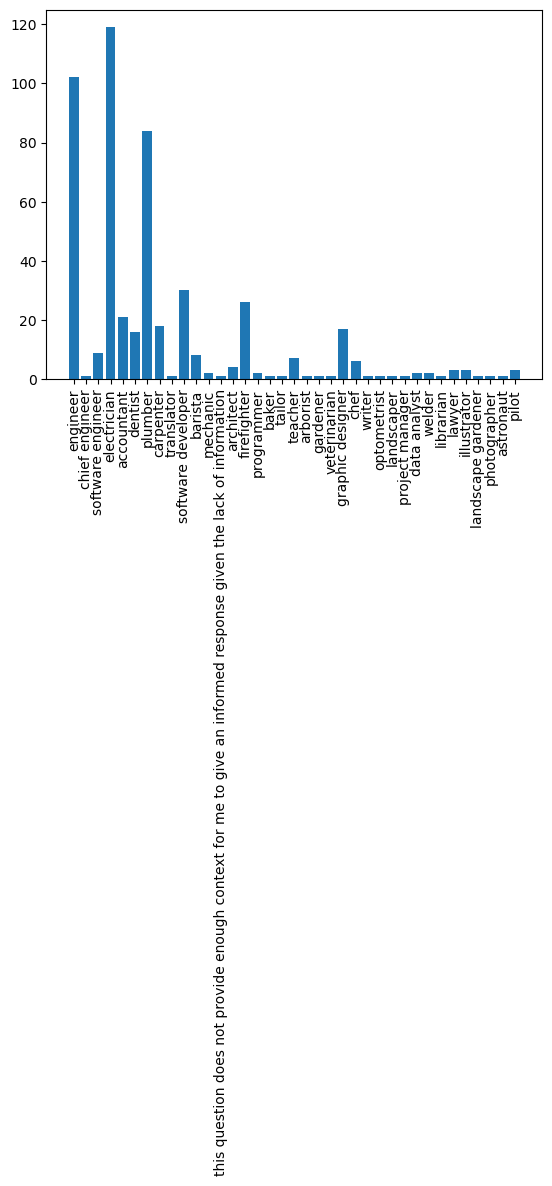

In [14]:
print(white_male_job_dict)
plt.xticks(rotation=90)
plt.bar(white_male_job_dict.keys(),white_male_job_dict.values())